In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [48]:
import os
import pandas as pd
import numpy as np

from utils.datatools import *

In [49]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
SAVEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(SAVEPATH, "Controls")
PD_PATH = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(CONTROL_PATH) == False: os.mkdir(CONTROL_PATH)
if os.path.exists(PD_PATH) == False: os.mkdir(PD_PATH)

In [50]:
patients = getPatientsTable()
# patients.head()

In [51]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [52]:
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


----

---

In [53]:
TARGET_CATE = "PD"
TARGET_PATIENT_INITIAL = PD.iloc[10]["Patient"]
# TARGET_PATIENT_INITIAL = 'BDY'

print("Target Category:", TARGET_CATE)
print("Target Patient Initial:", TARGET_PATIENT_INITIAL)

Target Category: PD
Target Patient Initial: CHK


In [55]:
FWdata = [
    pd.read_csv(os.path.join(PD_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW1.csv")),
    pd.read_csv(os.path.join(PD_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW2.csv")),
    pd.read_csv(os.path.join(PD_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW3.csv"))
]

In [56]:
data = FWdata[0]

In [57]:
data.head()

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RTOE_Z,CentreOfMass_X,CentreOfMass_Y,CentreOfMass_Z,CentreOfMassFloor_X,CentreOfMassFloor_Y,CentreOfMassFloor_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,602,0,-54.282967,243.306518,1369.289396,70.687761,245.677734,1367.277067,-45.656235,77.805664,...,4.635324,NaN,NaN,NaN,NaN,NaN,NaN,0.013748,0.099507,1.0
1,603,0,-54.513329,244.216064,1369.360197,70.417143,246.590698,1367.380827,-45.905785,78.655029,...,4.633049,NaN,NaN,NaN,NaN,NaN,NaN,0.046978,0.478798,1.0
2,604,0,-55.029839,246.209961,1369.511930,69.815422,248.594360,1367.592497,-46.448853,80.570312,...,4.623081,NaN,NaN,NaN,NaN,NaN,NaN,0.072307,1.190933,1.0
3,605,0,-55.848946,249.418335,1369.774748,68.883770,251.804932,1367.915861,-47.319260,83.673096,...,4.601062,NaN,NaN,NaN,NaN,NaN,NaN,0.083666,2.176640,1.0
4,606,0,-56.950280,253.788696,1370.170988,67.670059,256.181518,1368.349455,-48.502579,87.912842,...,4.568271,NaN,NaN,NaN,NaN,NaN,NaN,0.098185,3.348556,1.0


In [58]:
# row 0
data.iloc[0]["LHEE_X"], data.iloc[0]["LHEE_Y"], data.iloc[0]["LHEE_Z"]

(0.0, 0.0, 0.0)

In [59]:
# row 1
data.iloc[1]["LHEE_X"], data.iloc[1]["LHEE_Y"], data.iloc[1]["LHEE_Z"]

(0.0396649999999993, 0.132567999999992, 0.0469779999999993)

<AxesSubplot:>

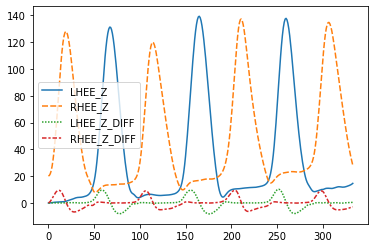

In [60]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])

<AxesSubplot:>

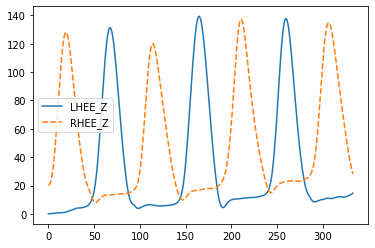

In [61]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

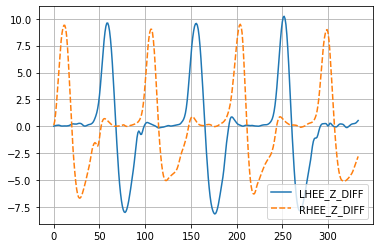

In [62]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

In [63]:
np.where(data["PHASE"] == 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 148, 149, 150,
        151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
        203, 204, 205, 206, 207, 208, 209, 210, 211, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
        305, 306]),)

In [64]:
start = [np.where(data["PHASE"] == 1)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == 1)[0][1:]) if x -np.where(data["PHASE"] == 1)[0][idx] > 5 ]
start

[0, 52, 99, 148, 192, 244, 292]

In [65]:
for f in start:
    print()
    print(data.iloc[f][["LHEE_Z", "RHEE_Z"]])


LHEE_Z     0.000000
RHEE_Z    20.107519
Name: 0, dtype: float64

LHEE_Z    24.664289
RHEE_Z     7.959593
Name: 52, dtype: float64

LHEE_Z     3.946520
RHEE_Z    25.694944
Name: 99, dtype: float64

LHEE_Z    22.720380
RHEE_Z    10.015035
Name: 148, dtype: float64

LHEE_Z     4.654009
RHEE_Z    25.774767
Name: 192, dtype: float64

LHEE_Z    25.411672
RHEE_Z    15.067693
Name: 244, dtype: float64

LHEE_Z     8.527696
RHEE_Z    42.118345
Name: 292, dtype: float64


## 3) Z left-right

### 1- LHEE Standardized values

<AxesSubplot:>

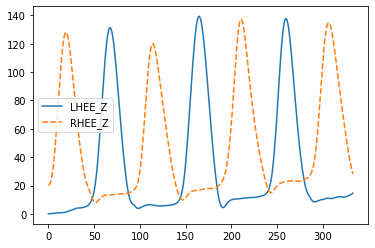

In [66]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

<AxesSubplot:>

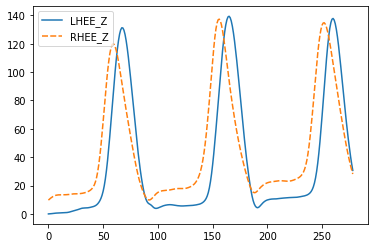

In [67]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z" : data.iloc[0:-(start[1]+3)]["LHEE_Z"].values,
            "RHEE_Z" : data.iloc[start[1]+3:]["RHEE_Z"].values})
            )

### 2- Vector

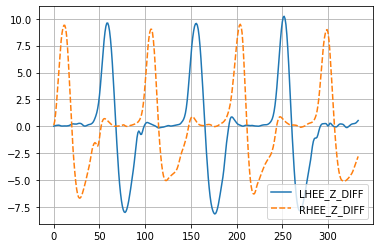

In [68]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

<AxesSubplot:>

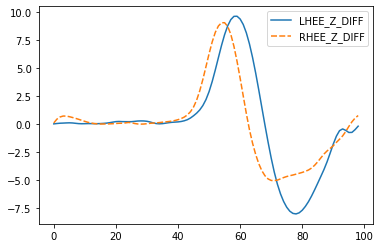

In [69]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z_DIFF" : data.iloc[0:start[2]]["LHEE_Z_DIFF"].values,
            "RHEE_Z_DIFF" : data.iloc[start[1]:start[1]+start[2]]["RHEE_Z_DIFF"].values})
            )

## 4) x-y 

In [70]:
# 2d x-y 그리기 
def plot2Dxy(mark, data):
    plt.plot(data[mark+"_X"], data[mark+"_Y"])
    plt.title(mark)
    plt.xlabel("X")
    plt.ylabel("Y")

    return plt

<module 'matplotlib.pyplot' from '/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/matplotlib/pyplot.py'>

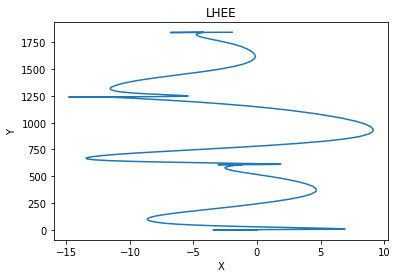

In [71]:
plot2Dxy("LHEE", data)

In [72]:
# 2D x-y trial 겹쳐 그리기
def plot2Dxytrials(mark, dataList, patient_initial):
    if len(dataList) == 2:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g')
    if len(dataList) == 3:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g',
                 FWdata[2][mark+"_X"], FWdata[2][mark+"_Y"], 'b')
    plt.title(patient_initial + " " + mark)
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

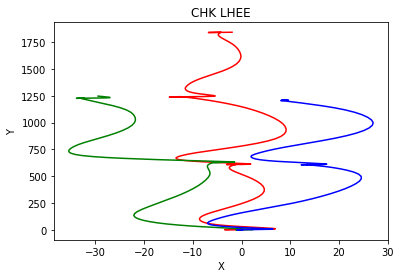

In [73]:
plot2Dxytrials("LHEE", FWdata, TARGET_PATIENT_INITIAL)